## **In this homework, you can only use numpy! No Pytorch, no mxnet, no "autograd" of any kind. You must compute gradients yourself and implement all optimizers yourself from scratch.**

# Problem 1

Consider the following function:
$$f(x, y) = x^2 + 10y^2$$
A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

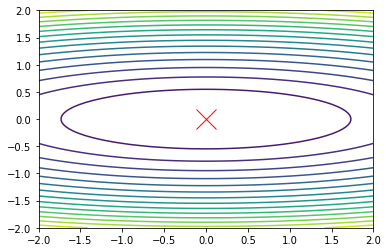

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

1. Show (via derivation through calculus, not through coding) that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newton-s-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

### **Problem 1.1**

In [2]:
# Problem 1.1
# The function
def f(x,y):
  return x**2 + 10*y**2

# Partial derivatives of the function
def grad_f(x, y):
  return np.array([2*x, 20*y])

# Gradient descent
def gradientDescent(x, y, learn_rate, n_iter):
  x_values = [x]
  y_values = [y]
  for i in range(n_iter):
    # Compute the gradient
    grad = grad_f(x,y)
    # Update the variables
    x = x - learn_rate * grad[0]
    y = y - learn_rate * grad[1]
    # Store the steps
    x_values.append(x)
    y_values.append(y)
  return x, y, x_values, y_values

In [3]:
# learning rate = 0.2
x, y, x_values, y_values = gradientDescent(2, 1, 0.1, 20)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)

Minimum value of the function: 10.000531691198313
x:  0.02305843009213694
y:  1.0


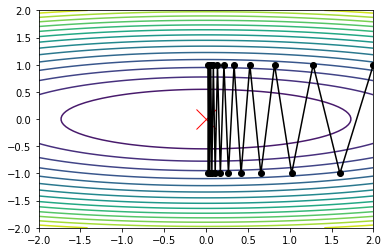

In [4]:
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')



*   Optimization diverges occurs when the learning rate is too high. It leads to overshooting the minimum and oscillating around it.


In [5]:
# Good learning rate: 0.085
x, y, x_values, y_values = gradientDescent(2, 1, 0.085, 20)

In [6]:
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)

Minimum value of the function: 0.002324741813214429
x:  0.048149506824613685
y:  0.0007979226629761234


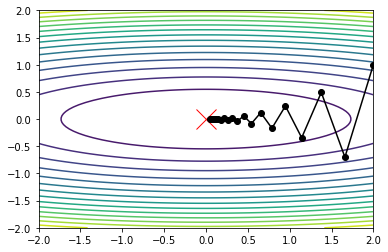

In [7]:
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')



*   At learning rate η = 0.085, we can see that after 20 steps the value of x and y approaches its minimum around [0,0]. And the error is approximately 0.049.



### **Problem 1.2**

For function $f(x,y)=x^2+10y^2$, start from $(x,y)^0 = \left[\begin{array}{ccc}
2\\
1
\end{array}\right]$, minima at $(0,0)$

The Newton's method as follows:

$x^1,y^1=(x,y)^0-H(f)((x,y)^0)^{-1} \triangledown _{x,y}f((x,y)^0)$

⟹$\triangledown _{x,y}f((x,y)=\left[\begin{array}{ccc}
{\delta \over \delta x} f(x,y)  \\
{\delta \over \delta y} f(x,y) 
\end{array}\right]=\left[\begin{array}{ccc}
2x\\
20y
\end{array}\right], \triangledown _{x,y}f(\left[\begin{array}{ccc}
2\\
1
\end{array}\right])=\left[\begin{array}{ccc}
4\\
20
\end{array}\right]$

⟹$H(f)(x,y)=\left[\begin{array}{ccc}
{\delta ^2 \over \delta x \delta x} f(x,y) & {\delta ^2 \over \delta x \delta y} f(x,y)  \\
{\delta \over \delta y  \delta x} f(x,y) & {\delta \over \delta y  \delta y} f(x,y) 
\end{array}\right]=\left[\begin{array}{ccc}
2 & 0\\
0 & 20
\end{array}\right], {H(f)(\left[\begin{array}{ccc}
2\\
1
\end{array}\right])}^{-1}=\left[\begin{array}{ccc}
1 \over 2 & 0\\
0 & 1 \over 20
\end{array}\right]$

⟹ $x^1,y^1=\left[\begin{array}{ccc}
2\\
1
\end{array}\right]-\left[\begin{array}{ccc}
1 \over 2 & 0\\
0 & 1 \over 20
\end{array}\right] \cdot \left[\begin{array}{ccc}
4\\
20
\end{array}\right]=\left[\begin{array}{ccc}
2\\
1
\end{array}\right]-\left[\begin{array}{ccc}
2\\
1
\end{array}\right]=\left[\begin{array}{ccc}
0\\
0
\end{array}\right]$



*   From the above steps, we can prove that the Newton's method will converge to the minimum in a single step. And actually, since the Hessian matrix is positive definite here, this function can converge to the minimum for any initial points. 



### **Problem 1.3**

In [8]:
# Momentum Optimizer
def MomentumOptimizer(x, y, momentum, learn_rate, n_iter):
  x_values = [x]
  y_values = [y]
  v1 = 0
  v2 = 0
  for i in range(n_iter):
    # Compute the gradient
    grad = grad_f(x,y)
    v1 = momentum * v1 + grad[0]
    v2 = momentum * v2 + grad[1]
    # Update the variables
    x = x - learn_rate * v1
    y = y - learn_rate * v2
    # Store the steps
    x_values.append(x)
    y_values.append(y)
  return x, y, x_values, y_values

In [9]:
# learning rate in 20 steps: 0.0072
x, y, x_values, y_values = MomentumOptimizer(2, 1, 0.9, 0.0072, 20)

In [10]:
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)

Minimum value of the function: 0.041649050349065686
x:  -0.2024060737669124
y:  0.008251252337244969


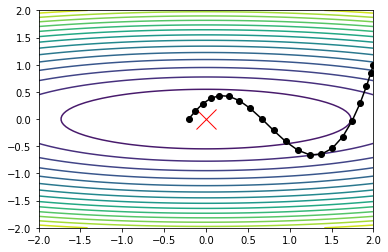

In [11]:
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')




*   Within 20 steps, the function can be minimized around [0,0]. But, I cannot find a proper learning rate which could perform better than previous method (SGD).




Minimum value of the function: 0.001924628702047761
x:  0.04115854292940825
y:  -0.004802114596464966


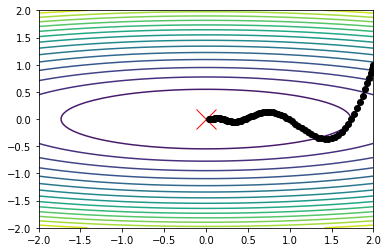

In [12]:
# learning rate in 100 steps (smallest): 0.0014
x, y, x_values, y_values = MomentumOptimizer(2, 1, 0.9, 0.0014, 100)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')

Minimum value of the function: 0.0029440523827333354
x:  0.010334167236924038
y:  0.016844160324137922


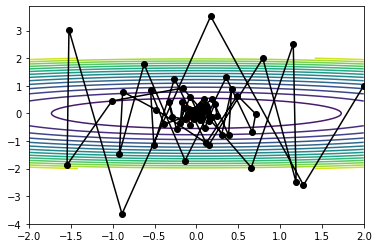

In [13]:
# learning rate in 100 steps (largest): 0.18
x, y, x_values, y_values = MomentumOptimizer(2, 1, 0.9, 0.18, 100)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')



*   For 100 steps, I find that the largest learning rate is 0.18 and smallest learning rate is 0.0014 which can still converge near the minimum. Both of theirs errors all smaller than the SGD.


### **Problem 1.4**

In [14]:
# Adam optimizer 𝛽1=0.9,𝛽2=0.999,𝜖=10−6,𝜂=0.001
def AdamOptimizer(x, y, learn_rate, n_iter):
  x_values = [x]
  y_values = [y]
  v = 0
  s = 0
  # Parameters
  beta1, beta2, eps = 0.9, 0.999, 1e-6
  for i in range(n_iter):
    # Compute the gradient
    grad = grad_f(x,y)
    # State variables
    v = beta1 * v + (1 - beta1) * grad
    s = beta2 * s + (1 - beta2) * grad**2
    v_hat = v / (1 - beta1**(i+1))
    s_hat = s / (1 - beta2**(i+1))
    # Update the variables
    x = x - learn_rate * v_hat[0] / (np.sqrt(s_hat[0]) + eps)
    y = y - learn_rate * v_hat[1] / (np.sqrt(s_hat[1]) + eps)
    # Store the steps
    x_values.append(x)
    y_values.append(y)
  return x, y, x_values, y_values

Minimum value of the function: 0.0029004449669601954
x:  0.05385577514418897
y:  6.71251631678655e-06


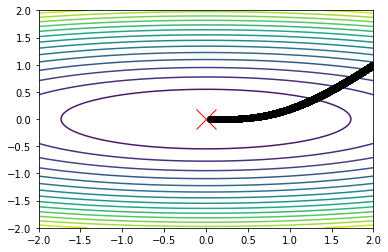

In [15]:
# 3500 Steps
x, y, x_values, y_values = AdamOptimizer(2, 1, 0.001, 3500)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')

*   For the above hyperparameters, it takes 3500 steps to converge using Adam. 

Minimum value of the function: 6.729302237885582e-05
x:  -0.0006161211853414855
y:  -0.0025867627851008917


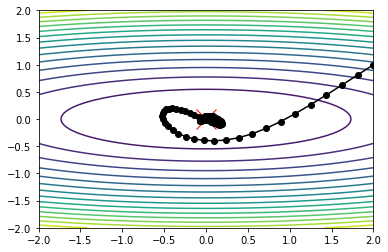

In [16]:
# change  𝜂  to the largest value you found that worked for Momentum with 100 steps
x, y, x_values, y_values = AdamOptimizer(2, 1, 0.189, 100)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')

*   I found that the largest learning rate is 0.189 which the function can still converge in 100 stpes. And the error is also smaller than the SGD method. 




# Problem 2

Now, consider minimization of the ["three-hump camel function"](https://www.sfu.ca/~ssurjano/camel3.html):

$$f(x, y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

This function also has a minimum at $(0, 0)$. Below is a contour plot.

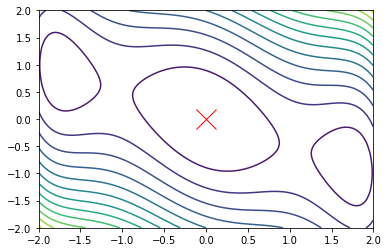

In [17]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
plot_contour()

As in the first problem, assume that optimization starts from $x = 2, y = 1$. Try minimizing it with SGD, Adam, and Momentum, while only changing the learning rate for each (not the momentum or other hyperparameters). Try to find an optimizer and learning rate that can reach the **global** minimum in as few steps as possible.

### **Problem 2**

In [18]:
# The three-hump camel function function
def f(x,y):
  return 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2

# Partial derivatives of the function
def grad_f(x, y):
  return np.array([4*x-4.2*x**3+x**5+y,x+2*y])

Minimum value of the function: 0.0017252980020713196
x:  0.030463313122487456
y:  -0.025340000000000085


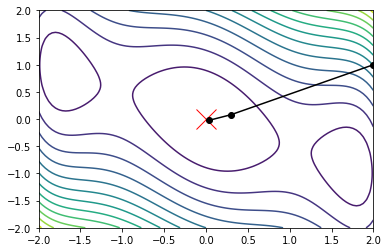

In [19]:
# SGD 
x, y, x_values, y_values = gradientDescent(2, 1, 0.23, 2)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')

Minimum value of the function: 0.042168761288638654
x:  -0.1430488779651372
y:  0.15396706077772215


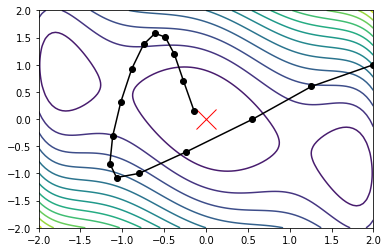

In [20]:
# Momentum Optimizer
x, y, x_values, y_values = MomentumOptimizer(2, 1, 0.9, 0.1, 15)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')

Minimum value of the function: 0.009872810752313638
x:  -0.03453520429328591
y:  -0.07097702087929839


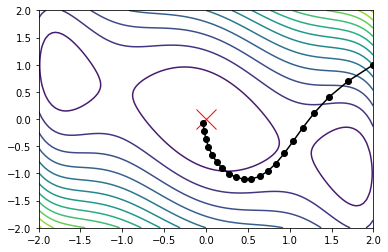

In [21]:
# Adam Optimizer
x, y, x_values, y_values = AdamOptimizer(2, 1, 0.3, 20)
# Print the minimum value of the function
print("Minimum value of the function:", f(x, y))
print("x: ", x)
print("y: ", y)
plot_contour()
plt.plot(x_values, y_values, '-o', color='black')

*   We can find that SGD is the better optimizer. It uses the least number of steps to minimize the function. 
